In [1]:
import numpy as np
import pandas as pd

In [2]:
hpdata = pd.read_csv('Melbourne_housing_FULL.csv')

# Data Understanding

In [3]:
hpdata.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
hpdata.info()    #NUMBER OF NUMERIC AND CATEGORICAL DATA TYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
numeric = hpdata.select_dtypes(include='number')
numeric.shape

(34857, 13)

In [6]:
categorical = hpdata.select_dtypes(exclude='number')
categorical.shape

(34857, 8)

# Data Cleaning

In [7]:
hpdata_d = hpdata[hpdata.duplicated()]

In [8]:
hpdata.shape

(34857, 21)

In [9]:
sum(hpdata.duplicated())

1

#### DUPLICATION

In [10]:
hpdata_d.shape  #ONLY 1 ROW OF DUPLICATE DATA

(1, 21)

In [11]:
hpdata_nd = hpdata.drop_duplicates()

In [12]:
hpdata_nd.shape

(34856, 21)

#### VARIABLE TYPE

In [13]:
cat_col = hpdata_nd.select_dtypes({'object'}).columns

In [14]:
cat_col

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [15]:
hpdata_nd[cat_col] = hpdata_nd[cat_col].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
hpdata_nd.info()  #EIGHT ATTRIBUTES HAD TO BE CHANGED FROM OBJECT TO CATEGORY DATA TYPE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       26630 non-null  float64 
 12  Car            26128 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  

#### MISSING VALUE TREATMENT

In [17]:
hpdata_nd.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### a) Missing Value: Price

In [18]:
hpdata_nd['Price'].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [19]:
hpdata_nd['Price'].skew() #since data is positively skewed, taking the median to imputate

2.5889693410528607

In [20]:
hpdata_nd['Price'].median()

870000.0

In [21]:
hpdata_nd['Price'].fillna(870000,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
hpdata_nd['Price'].describe()

count    3.485600e+04
mean     1.010842e+06
std      5.720069e+05
min      8.500000e+04
25%      6.950000e+05
50%      8.700000e+05
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [23]:
pd.isna(hpdata_nd['Price']).sum()

0

In [24]:
hpdata_nd['Price'].head()

0     870000.0
1    1480000.0
2    1035000.0
3     870000.0
4    1465000.0
Name: Price, dtype: float64

#### b) Missing Value: Bedroom2

In [26]:
hpdata_nd['Bedroom2'].describe()

count    26639.000000
mean         3.084650
std          0.980708
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: Bedroom2, dtype: float64

In [27]:
hpdata_nd['Bedroom2'].skew()   #Taking the median to imputate the data since bedroom should be an integer and also, not much diff b/w mean and median

1.4063301794964842

In [28]:
hpdata_nd['Bedroom2'].fillna(hpdata_nd['Bedroom2'].median(),inplace=True)

In [29]:
pd.isna(hpdata_nd['Bedroom2']).sum()

0

#### c) Missing Value: Bathroom

In [31]:
hpdata_nd['Bathroom'].describe()

count    26630.000000
mean         1.624747
std          0.724177
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

In [32]:
hpdata_nd['Bathroom'].skew()

1.3564998549147482

In [33]:
hpdata_nd['Bathroom'].fillna(hpdata_nd['Bathroom'].median(),inplace=True)

In [34]:
pd.isna(hpdata_nd['Bathroom']).sum()

0

#### d) Missing Value: Car

In [35]:
hpdata_nd['Car'].describe()

count    26128.000000
mean         1.728835
std          1.010789
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

In [36]:
hpdata_nd['Car'].fillna(hpdata_nd['Car'].median(),inplace=True)

In [37]:
hpdata_nd['Car'].isnull().sum()

0

In [38]:
hpdata_nd.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### e) Missing Value: Distance, Postcode, CouncilArea, Regionname, Propertycount

##### Dropping all these rows with null values.

In [39]:
null_columns = hpdata_nd.columns[hpdata_nd.isnull().any()]

In [40]:
hpdata_nd[null_columns].isnull().sum()

Distance             1
Postcode             1
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [41]:
hpdata_nd[hpdata_nd['Distance'].isnull()][null_columns]

,Distance,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
hpdata_nd = hpdata_nd.dropna(axis=0,subset=['Distance'])

In [43]:
hpdata_nd['Distance'].isnull().sum()

0

In [44]:
hpdata_nd = hpdata_nd.dropna(axis=0,subset=['Regionname'])

In [45]:
hpdata_nd['Regionname'].isnull().sum()

0

In [46]:
hpdata_nd.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

#### f) Missing Values: Landsize

In [47]:
hpdata_nd['Landsize'].describe()

count     23046.000000
mean        593.607177
std        3398.915462
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

In [48]:
hpdata_nd['Landsize'].skew()  #heavily skewed data, using median to imputate it

96.02024045160915

In [49]:
hpdata_nd['Landsize'].fillna(hpdata_nd['Landsize'].median(),inplace=True)

In [50]:
hpdata_nd['Landsize'].isnull().sum()

0

#### g) Missing Value: Building Area

In [51]:
hpdata_nd['BuildingArea'].value_counts()

120.00     185
100.00     161
110.00     159
130.00     153
115.00     149
          ... 
157.85       1
130.52       1
196.10       1
2002.00      1
664.00       1
Name: BuildingArea, Length: 740, dtype: int64

In [52]:
hpdata_nd.drop(['BuildingArea'],axis=1,inplace=True)  
#since only 185 records have a value of '120' and the 21k records are empty, hence dropping this column from the dataset

In [53]:
hpdata_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34853 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34853 non-null  category
 1   Address        34853 non-null  category
 2   Rooms          34853 non-null  int64   
 3   Type           34853 non-null  category
 4   Price          34853 non-null  float64 
 5   Method         34853 non-null  category
 6   SellerG        34853 non-null  category
 7   Date           34853 non-null  category
 8   Distance       34853 non-null  float64 
 9   Postcode       34853 non-null  float64 
 10  Bedroom2       34853 non-null  float64 
 11  Bathroom       34853 non-null  float64 
 12  Car            34853 non-null  float64 
 13  Landsize       34853 non-null  float64 
 14  YearBuilt      15550 non-null  float64 
 15  CouncilArea    34853 non-null  category
 16  Lattitude      26880 non-null  float64 
 17  Longtitude     26880 non-null  

#### h) Missing Value: YearBuilt

In [54]:
hpdata_nd['YearBuilt'].value_counts()  #imputating it with the most occurances of the value, 
                                       #i.e. the most occurances for year 1970

1970.0    1490
1960.0    1260
1950.0    1089
1980.0     726
1900.0     606
          ... 
1868.0       1
1883.0       1
1196.0       1
1855.0       1
1830.0       1
Name: YearBuilt, Length: 160, dtype: int64

In [55]:
hpdata_nd['YearBuilt'].fillna(1970,inplace=True)

In [56]:
hpdata_nd['YearBuilt'].isnull().sum()

0

In [57]:
hpdata_nd['YearBuilt'].value_counts()

1970.0    20793
1960.0     1260
1950.0     1089
1980.0      726
1900.0      606
          ...  
1868.0        1
1883.0        1
1196.0        1
1855.0        1
1830.0        1
Name: YearBuilt, Length: 160, dtype: int64

#### i) Missing Value: Lattitude

In [58]:
hpdata_nd['Lattitude'].describe()

count    26880.000000
mean       -37.810634
std          0.090281
min        -38.190430
25%        -37.862950
50%        -37.807600
75%        -37.754092
max        -37.390200
Name: Lattitude, dtype: float64

In [59]:
hpdata_nd['Lattitude'].fillna(hpdata_nd['Lattitude'].mean(),inplace=True)

In [60]:
hpdata_nd['Lattitude'].isnull().sum()

0

#### j) Missing Value: Longitude

In [61]:
hpdata_nd['Longtitude'].describe()

count    26880.000000
mean       145.001845
std          0.120167
min        144.423790
25%        144.933500
50%        145.007800
75%        145.071900
max        145.526350
Name: Longtitude, dtype: float64

In [62]:
hpdata_nd['Longtitude'].fillna(hpdata_nd['Longtitude'].mean(),inplace=True)

In [63]:
hpdata_nd['Longtitude'].isnull().sum()

0

In [64]:
hpdata_nd.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

#### OUTLIER TREATMENT

In [65]:
hpdata_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34853 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34853 non-null  category
 1   Address        34853 non-null  category
 2   Rooms          34853 non-null  int64   
 3   Type           34853 non-null  category
 4   Price          34853 non-null  float64 
 5   Method         34853 non-null  category
 6   SellerG        34853 non-null  category
 7   Date           34853 non-null  category
 8   Distance       34853 non-null  float64 
 9   Postcode       34853 non-null  float64 
 10  Bedroom2       34853 non-null  float64 
 11  Bathroom       34853 non-null  float64 
 12  Car            34853 non-null  float64 
 13  Landsize       34853 non-null  float64 
 14  YearBuilt      34853 non-null  float64 
 15  CouncilArea    34853 non-null  category
 16  Lattitude      34853 non-null  float64 
 17  Longtitude     34853 non-null  

In [66]:
hpn = hpdata_nd.select_dtypes(exclude='category') #Subset of the datset with only numeric values

In [67]:
hpn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34853 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34853 non-null  int64  
 1   Price          34853 non-null  float64
 2   Distance       34853 non-null  float64
 3   Postcode       34853 non-null  float64
 4   Bedroom2       34853 non-null  float64
 5   Bathroom       34853 non-null  float64
 6   Car            34853 non-null  float64
 7   Landsize       34853 non-null  float64
 8   YearBuilt      34853 non-null  float64
 9   Lattitude      34853 non-null  float64
 10  Longtitude     34853 non-null  float64
 11  Propertycount  34853 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.5 MB


In [68]:
import seaborn as sns

#### a) Price

In [69]:
hpn['Price'].describe()

count    3.485300e+04
mean     1.010867e+06
std      5.720244e+05
min      8.500000e+04
25%      6.950000e+05
50%      8.700000e+05
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64

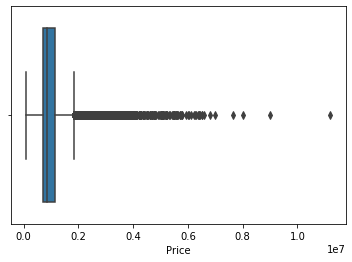

In [70]:
sns.boxplot(hpn['Price'])

In [71]:
q1 = hpn['Price'].quantile(.25)
q3 = hpn['Price'].quantile(.75)
iqr = q3 - q1
floor = q1 - iqr*1.5
cap = q3 + iqr*1.5

In [72]:
hpdata_nd = hpn[(hpn['Price']>floor) & (hpn['Price']<cap)]

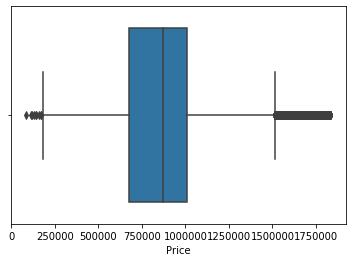

In [73]:
sns.boxplot(hpdata_nd['Price'])

#### b) Distance

In [74]:
hpn['Distance'].describe()

count    34853.000000
mean        11.185083
std          6.789043
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

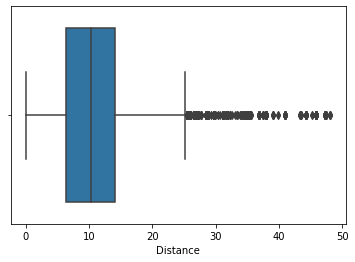

In [75]:
sns.boxplot(hpn['Distance'])

In [76]:
q1d = hpn['Distance'].quantile(.25)
q3d = hpn['Distance'].quantile(.75)
iqrd = q3d - q1d
floord = q1d - iqrd*1.5
capd = q3d + iqrd*1.5

In [77]:
hpdata_nd = hpn[(hpn['Distance']>floord) & (hpn['Distance']<capd)]

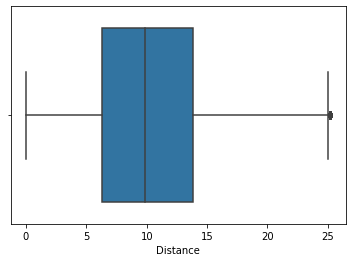

In [78]:
sns.boxplot(hpdata_nd['Distance'])

#### c) Landsize

In [79]:
hpn['Landsize'].describe()

count     34853.000000
mean        569.010358
std        2764.066159
min           0.000000
25%         357.000000
50%         521.000000
75%         598.000000
max      433014.000000
Name: Landsize, dtype: float64

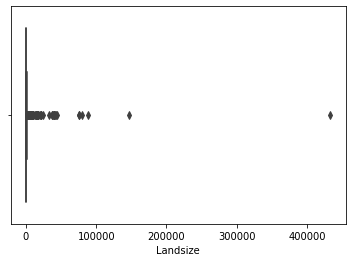

In [80]:
sns.boxplot(hpn['Landsize'])

In [81]:
q1l = hpn['Landsize'].quantile(.25)
q3l = hpn['Landsize'].quantile(.75)
iqr = q3l - q1l
floorl = q1l - iqr*1.5
capl = q3l + iqr*1.5

In [82]:
hpdata_nd = hpn[(hpn['Landsize']>floorl) & (hpn['Landsize']<capl)]

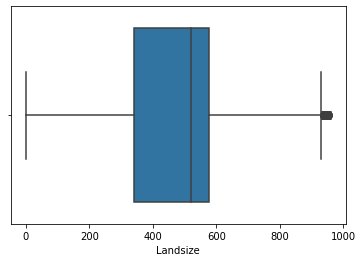

In [83]:
sns.boxplot(hpdata_nd['Landsize'])

In [84]:
#rest all the other numeric data types are discrete in nature hence no outlier treatment for them

# Feature Engineering

#### FEATURE TRANSFORMATION

In [85]:
hpdata_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33530 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          33530 non-null  int64  
 1   Price          33530 non-null  float64
 2   Distance       33530 non-null  float64
 3   Postcode       33530 non-null  float64
 4   Bedroom2       33530 non-null  float64
 5   Bathroom       33530 non-null  float64
 6   Car            33530 non-null  float64
 7   Landsize       33530 non-null  float64
 8   YearBuilt      33530 non-null  float64
 9   Lattitude      33530 non-null  float64
 10  Longtitude     33530 non-null  float64
 11  Propertycount  33530 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.3 MB


#### PLotting the graphs for variables with non-linear trends

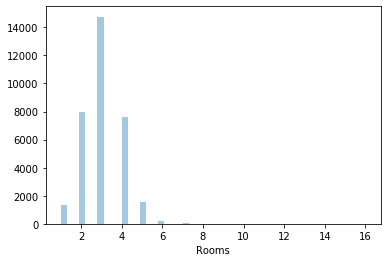

In [86]:
sns.distplot(hpdata_nd['Rooms'],kde=False)

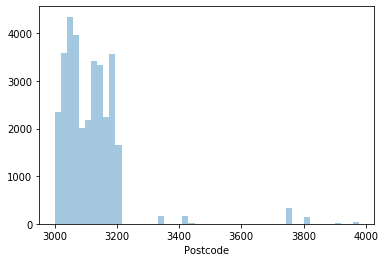

In [87]:
sns.distplot(hpdata_nd['Postcode'],kde=False)

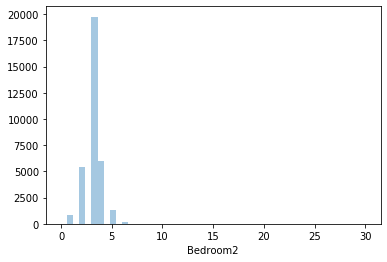

In [88]:
sns.distplot(hpdata_nd['Bedroom2'],kde=False)

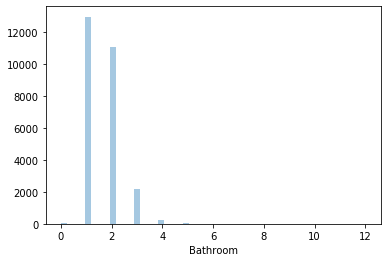

In [89]:
sns.distplot(hpdata['Bathroom'],kde=False)

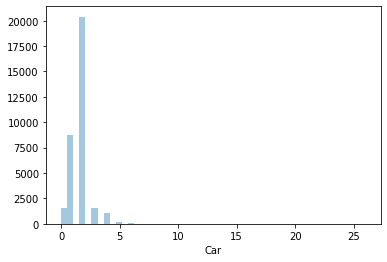

In [90]:
sns.distplot(hpdata_nd['Car'],kde=False)

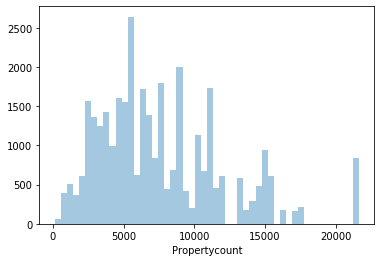

In [91]:
sns.distplot(hpdata_nd['Propertycount'],kde=False)